In [3]:
import pandas as pd

# Chemin vers le fichier CSV
chemin_fichier = r'C:\Users\hp\Desktop\task1\iris.csv'

# Charger le fichier CSV dans un DataFrame pandas
dataframe = pd.read_csv(chemin_fichier)

# Maintenant, vous pouvez utiliser le DataFrame 'dataframe' pour travailler avec vos données


In [4]:
# Afficher les 10 premières lignes du DataFrame
print(dataframe.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [5]:
print(dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [6]:
print(dataframe.describe())


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [7]:
print(dataframe.isnull().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
# Vérifier les lignes dupliquées dans le DataFrame
valeurs_dupliquees = dataframe.duplicated()

In [9]:
# Afficher les lignes dupliquées
print("Lignes dupliquées :")
print(valeurs_dupliquees)

Lignes dupliquées :
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [10]:
# Compter le nombre total de lignes dupliquées
nombre_de_lignes_dupliquees = valeurs_dupliquees.sum()
print("Nombre total de lignes dupliquées :", nombre_de_lignes_dupliquees)

Nombre total de lignes dupliquées : 0


In [11]:
# Sélectionner les colonnes quantitatives
colonnes_quantitatives = dataframe[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [12]:
# Liste pour stocker les valeurs de l'inertie (inertia) pour différents nombres de clusters
inertie = []

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [15]:
# Tester différents nombres de clusters de 1 à 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(colonnes_quantitatives)
    # Ajouter l'inertie du modèle à la liste
    inertie.append(kmeans.inertia_)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
print(inertie)

[680.8244, 152.36870647733906, 78.94084142614601, 57.31787321428571, 46.56163015873016, 38.930963049671746, 34.19068792479663, 30.06387443273313, 27.842356060606065, 26.048202248044355]


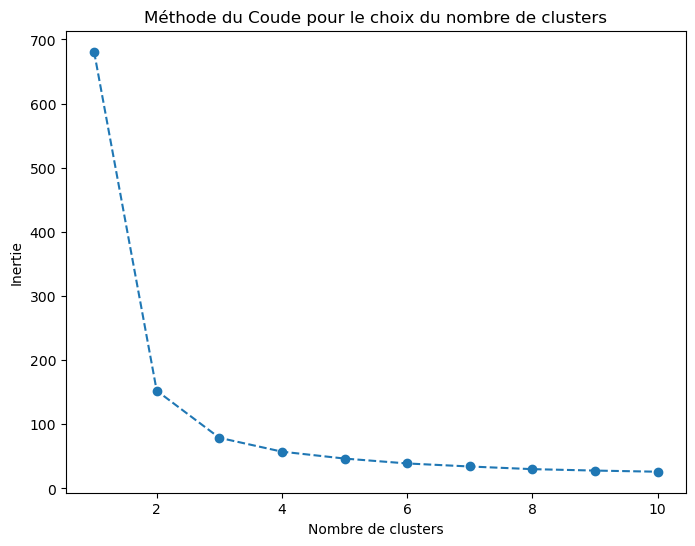

In [16]:
# Tracer le graphique du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertie, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour le choix du nombre de clusters')
plt.show()

In [19]:
# Appliquer KMeans au dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(colonnes_quantitatives)

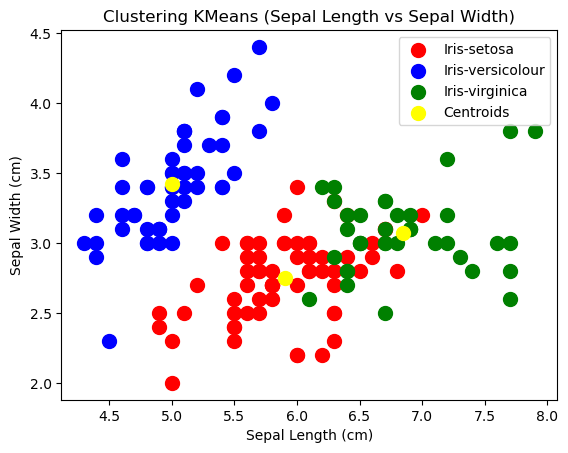

In [20]:
# Visualiser les clusters - Sur les deux premières colonnes
plt.scatter(colonnes_quantitatives[y_kmeans == 0]['SepalLengthCm'], colonnes_quantitatives[y_kmeans == 0]['SepalWidthCm'], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(colonnes_quantitatives[y_kmeans == 1]['SepalLengthCm'], colonnes_quantitatives[y_kmeans == 1]['SepalWidthCm'], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(colonnes_quantitatives[y_kmeans == 2]['SepalLengthCm'], colonnes_quantitatives[y_kmeans == 2]['SepalWidthCm'],
            s = 100, c = 'green', label = 'Iris-virginica')

# Tracer les centroïdes des clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clustering KMeans (Sepal Length vs Sepal Width)')
plt.show()
